In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [4]:
df.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0


In [5]:
df.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


In [8]:
def change_day(x):
    if x == '월':
        return 0
    elif x == '화':
        return 1
    elif x == '수':
        return 2
    elif x == '목':
        return 3
    elif x == '금':
        return 4

day = df['요일'].map(change_day)

In [28]:
mon = day.loc[ day==0 ].count()
tue = day.loc[ day==1 ].count()
wed = day.loc[ day==2 ].count()
thu = day.loc[ day==3 ].count()
fri = day.loc[ day==4 ].count()
tot = day.count()

In [31]:
# day frequency table
day_ft = pd.DataFrame(data=[
    [0, mon, mon/tot],
    [1, tue, tue/tot],
    [2, wed, wed/tot],
    [3, thu, thu/tot],
    [4, fri, fri/tot]
], columns=['day', 'count', 'percentile'])

In [32]:
day_ft

,day,count,percentile
0,0,241,0.20000
1,1,240,0.19917
2,2,239,0.19834
3,3,244,0.20249
4,4,241,0.20000


<AxesSubplot:>

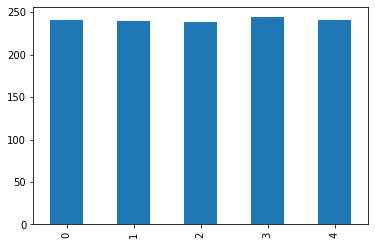

In [35]:
day_ft['count'].plot(kind='bar')

<AxesSubplot:>

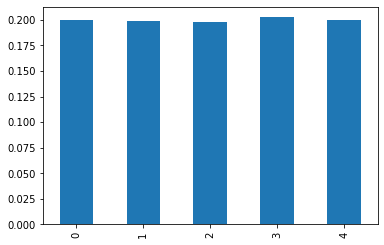

In [36]:
day_ft['percentile'].plot(kind='bar')

<AxesSubplot:ylabel='percentile'>

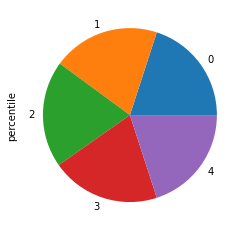

In [37]:
day_ft['percentile'].plot(kind='pie')

#### 텍스트 변수?

메뉴들을 카테고리로 만들어서 빈도수 확인  

In [41]:
morningMenu = df['조식메뉴'].map(lambda x: x.split())
morningMenu.map(lambda x: len(x))

0       9
1       9
2       9
3       9
4       9
       ..
1200    8
1201    8
1202    8
1203    8
1204    8
Name: 조식메뉴, Length: 1205, dtype: int64

In [49]:
def removeExtras(x):
    ret = []
    for i in range(len(x)):
        if x[i][0] == '(' and x[i][-1] == ')':
            continue
        ret.append(x[i])
    return ret

In [50]:
morningMenu.map(removeExtras)

0       [모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...
1       [모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...
2       [모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...
3       [모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...
4       [모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...
                              ...                        
1200    [모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...
1201    [모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...
1202    [모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...
1203    [모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자...
1204    [모닝롤/야채샌드, 우유/주스, 계란후라이/찐계란, 참치죽/흑미밥, 홍합탕, 애호박...
Name: 조식메뉴, Length: 1205, dtype: object

In [51]:
morningMenu.map(removeExtras).map(lambda x: len(x))

0       7
1       7
2       7
3       7
4       7
       ..
1200    8
1201    8
1202    8
1203    8
1204    8
Name: 조식메뉴, Length: 1205, dtype: int64

In [60]:
length = morningMenu.map(removeExtras).map(lambda x: len(x))

In [63]:
length.rename('num', inplace=True)

0       7
1       7
2       7
3       7
4       7
       ..
1200    8
1201    8
1202    8
1203    8
1204    8
Name: num, Length: 1205, dtype: int64

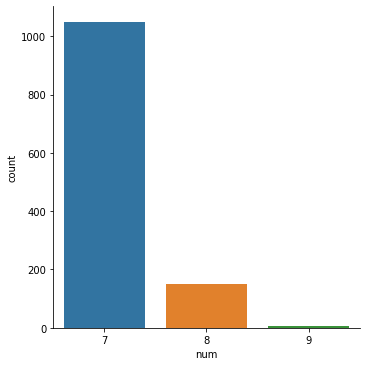

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='num', data=pd.DataFrame(length), kind='count')
plt.show()

In [75]:
lunchMenu = df['중식메뉴'].map(lambda x: x.split())

In [76]:
lunchMenu = lunchMenu.map(removeExtras)

In [87]:
lunchMenu

0           [쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]
1       [쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...
2           [카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]
3          [쌀밥/잡곡밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]
4           [쌀밥/잡곡밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]
                              ...                        
1200    [쌀밥/흑미밥/찰현미밥, 아욱국, 수제함박스테이크, 견과류마카로니범벅, 생깻잎지, ...
1201    [쌀밥/수수밥/찰현미밥, 냉이된장국, 동파육, 봄동전, 청경채/버섯숙회*초장, 무생...
1202    [전주비빔밥*약고추장, 계란파국, 요거닭, 올방개묵무침, 파프리카해초무침, 포기김치...
1203    [쌀밥/흑미밥/찰현미밥, 전주식콩나물해장국, 돈육간장불고기, 깐풍연근, 연두부*달래...
1204    [쌀밥/귀리밥/찰현미밥, 들깨미역국, 교촌간장치킨, 옥수수콘치즈구이, 가지고추장무침...
Name: 중식메뉴, Length: 1205, dtype: object

In [91]:
lunchLength = lunchMenu.map(lambda x: len(x))

In [92]:
lunchLength.rename('num', inplace=True)

0       7
1       7
2       7
3       7
4       7
       ..
1200    7
1201    7
1202    7
1203    7
1204    7
Name: num, Length: 1205, dtype: int64

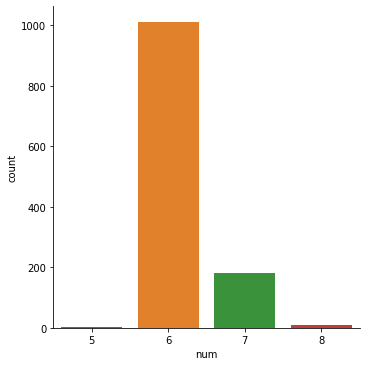

In [93]:
sns.catplot(x='num', data=pd.DataFrame(lunchLength), kind='count')
plt.show()

In [78]:
dinnerMenu = df['석식메뉴'].map(lambda x: x.split())

In [79]:
dinnerMenu = dinnerMenu.map(removeExtras)

In [80]:
dinnerMenu

0               [쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]
1                 [콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]
2             [쌀밥/잡곡밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]
3                 [미니김밥*겨자장, 우동, 멕시칸샐러드, 군고구마, 무피클, 포기김치]
4             [쌀밥/잡곡밥, 차돌박이찌개, 닭갈비, 감자소세지볶음, 콩나물무침, 포기김치]
                              ...                        
1200    [김치볶음밥, 미니쫄우동*맛살튀김, 브로콜리깨소스무침, 계란후라이, 고들빼기무침, ...
1201        [흑미밥, 쇠고기무국, 삼치양념구이, 비엔나채소볶음, 숙주나물당근무침, 포기김치]
1202    [흑미밥, 수제비국, 수제맛쵸킹탕수육, 유부채소겨자냉채, 참나물무침, 갓김치/겉절이김치]
1203        [흑미밥, 열무된장국, 장어강정*데리야끼소스, 깻잎쌈*생강채, 오이선, 포기김치]
1204     [(New)할라피뇨멸치주먹밥, 잔치국수, 수제고기육전, 쑥갓나물, 양파초절임, 깍두기]
Name: 석식메뉴, Length: 1205, dtype: object

In [94]:
dinnerLength = dinnerMenu.map(lambda x: len(x))

In [95]:
dinnerLength.rename('num', inplace=True)

0       6
1       6
2       6
3       6
4       6
       ..
1200    6
1201    6
1202    6
1203    6
1204    6
Name: num, Length: 1205, dtype: int64

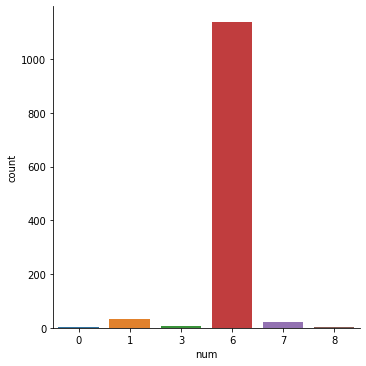

In [97]:
sns.catplot(x='num', data=pd.DataFrame(dinnerLength), kind='count')
plt.show()